In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv("C:/Users/ADMIN/Downloads/Customer.csv")
products = pd.read_csv("C:/Users/ADMIN/Downloads/prod_cat_info.csv")
transactions = pd.read_csv("C:/Users/ADMIN/Downloads/Transactions.csv")

In [3]:
customers.info()
products.info()
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_cat_code      23 non-null     int64 
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     int64 
 3   prod_subcat        23 non-null     object
dtypes: int64(2), object(2)
memory usage: 868.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Nul

In [5]:

customers.isnull().sum()
products.isnull().sum()
transactions.isnull().sum()



transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
dtype: int64

In [6]:
customers.duplicated().sum()
transactions.duplicated().sum()


np.int64(13)

In [8]:
customers = customers.drop_duplicates()
transactions = transactions.drop_duplicates()
transactions = transactions.dropna()

In [16]:
print(transactions.columns)
print(customers.columns)


Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type'],
      dtype='object')
Index(['customer_Id', 'DOB', 'Gender', 'city_code'], dtype='object')


In [20]:
print("Customers:", customers.columns.tolist())
print("Products:", products.columns.tolist())
print("Transactions:", transactions.columns.tolist())


Customers: ['customer_Id', 'DOB', 'Gender', 'city_code']
Products: ['prod_cat_code', 'prod_cat', 'prod_sub_cat_code', 'prod_subcat']
Transactions: ['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code', 'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type']


In [21]:
customers.columns = customers.columns.str.lower().str.strip()
products.columns = products.columns.str.lower().str.strip()
transactions.columns = transactions.columns.str.lower().str.strip()


In [23]:
print(customers.head())
print(products.head())
print(transactions.head())


   customer_id         dob gender  city_code
0       268408  02/01/1970      M        4.0
1       269696  07/01/1970      F        8.0
2       268159  08/01/1970      F        8.0
3       270181  10/01/1970      F        2.0
4       268073  11/01/1970      M        1.0
   prod_cat_code  prod_cat  prod_sub_cat_code prod_subcat
0              1  Clothing                  4        Mens
1              1  Clothing                  1       Women
2              1  Clothing                  3        Kids
3              2  Footwear                  1        Mens
4              2  Footwear                  3       Women
   transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  qty  \
0     80712190438   270351  28-02-2014                 1              1   -5   
1     29258453508   270384  27-02-2014                 5              3   -5   
2     51750724947   273420  24-02-2014                 6              5   -2   
3     93274880719   271509  24-02-2014                11      

In [24]:
print("CUSTOMERS COLUMNS:", customers.columns.tolist())
print("TRANSACTIONS COLUMNS:", transactions.columns.tolist())
print("PRODUCTS COLUMNS:", products.columns.tolist())


CUSTOMERS COLUMNS: ['customer_id', 'dob', 'gender', 'city_code']
TRANSACTIONS COLUMNS: ['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code', 'prod_cat_code', 'qty', 'rate', 'tax', 'total_amt', 'store_type']
PRODUCTS COLUMNS: ['prod_cat_code', 'prod_cat', 'prod_sub_cat_code', 'prod_subcat']


In [26]:
print(products.columns.tolist())


['prod_cat_code', 'prod_cat', 'prod_sub_cat_code', 'prod_subcat']


In [27]:
df = transactions.merge(customers, left_on="cust_id", right_on="customer_id", how="left")

df = df.merge(
    products,
    left_on=["prod_cat_code", "prod_subcat_code"],
    right_on=["prod_cat_code", "prod_sub_cat_code"],
    how="left"
)

df.head()


,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,qty,rate,tax,total_amt,store_type,customer_id,dob,gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26/09/1981,M,5.0,Clothing,1,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,11/05/1973,F,8.0,Electronics,5,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27/07/1992,M,8.0,Books,6,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,271509,08/06/1981,M,3.0,Home and kitchen,11,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27/07/1992,M,8.0,Books,6,DIY


In [30]:
df["tran_date"] = pd.to_datetime(
    df["tran_date"],
    format="mixed",
    dayfirst=True,
    errors="coerce"
)


In [31]:
df["tran_date"].isna().sum()


np.int64(0)

In [32]:
df["month"] = df["tran_date"].dt.to_period("M")
df.groupby("month")["total_amt"].sum()


month
2011-01     337307.880
2011-02    1087283.535
2011-03    1376537.175
2011-04    1379838.915
2011-05    1174157.530
2011-06    1226771.000
2011-07    1310933.325
2011-08    1230637.395
2011-09    1437136.480
2011-10    1399860.410
2011-11    1450866.105
2011-12    1332084.130
2012-01    1207435.710
2012-02    1306702.280
2012-03    1440357.555
2012-04    1214127.590
2012-05    1351648.155
2012-06    1295998.145
2012-07    1246654.370
2012-08    1325005.500
2012-09    1320331.350
2012-10    1413123.725
2012-11    1379593.605
2012-12    1417278.525
2013-01    1378639.990
2013-02    1194731.525
2013-03    1465626.695
2013-04    1276018.640
2013-05    1286049.830
2013-06    1254308.705
2013-07    1226628.455
2013-08    1397714.500
2013-09    1339146.185
2013-10    1368587.805
2013-11    1269408.530
2013-12    1257120.930
2014-01    1500564.585
2014-02     735078.045
Freq: M, Name: total_amt, dtype: float64

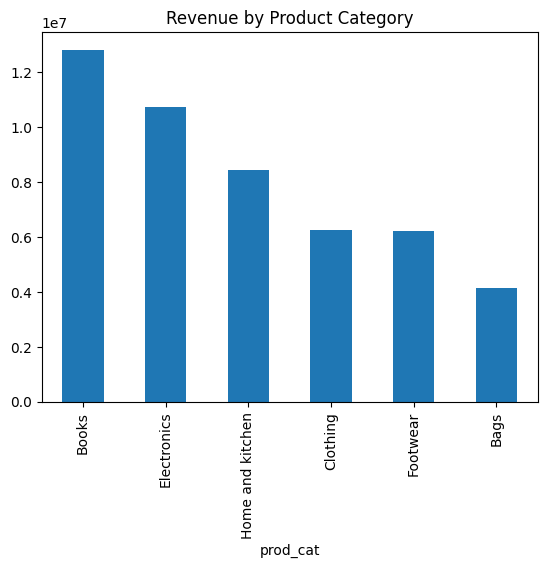

In [33]:
category_sales = df.groupby("prod_cat")["total_amt"].sum().sort_values(ascending=False)
category_sales.plot(kind="bar", title="Revenue by Product Category")
plt.show()


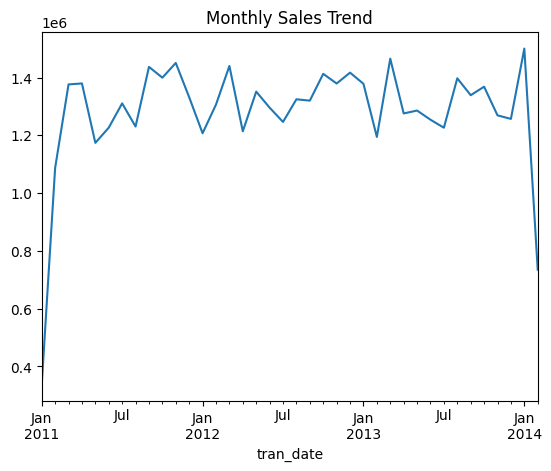

In [34]:
monthly_sales = df.groupby(df["tran_date"].dt.to_period("M"))["total_amt"].sum()
monthly_sales.plot(kind="line", title="Monthly Sales Trend")
plt.show()

In [40]:
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")


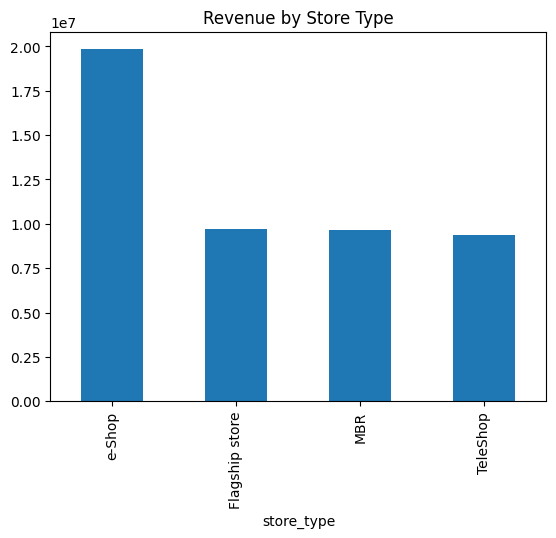

In [41]:
import matplotlib.pyplot as plt

store_sales = (
    df.groupby("store_type")["total_amt"]
    .sum()
    .sort_values(ascending=False)
)

store_sales.plot(kind="bar", title="Revenue by Store Type")
plt.show()


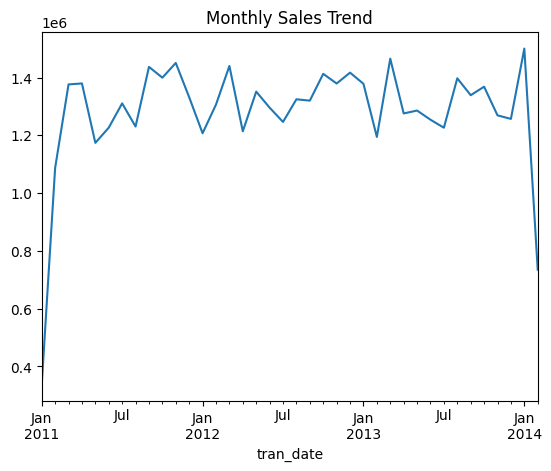

In [42]:
monthly_sales = df.groupby(df["tran_date"].dt.to_period("M"))["total_amt"].sum()
monthly_sales.plot(kind="line", title="Monthly Sales Trend")
plt.show()

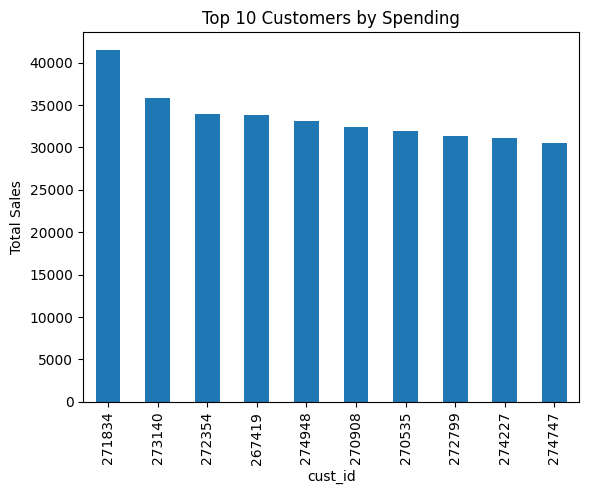

In [44]:
import matplotlib.pyplot as plt

top_customers = (
    df.groupby("cust_id")["total_amt"]
    .sum()
    .nlargest(10)
)

top_customers.plot(kind="bar", title="Top 10 Customers by Spending")
plt.ylabel("Total Sales")
plt.show()


In [46]:
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")
print(df.columns.tolist())


['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code', 'prod_cat_code', 'qty', 'rate', 'tax', 'total_amt', 'store_type', 'customer_id', 'dob', 'gender', 'city_code', 'prod_cat', 'prod_sub_cat_code', 'prod_subcat', 'month']


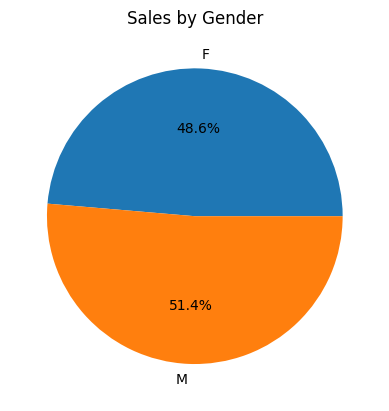

In [47]:
import matplotlib.pyplot as plt

gender_sales = df.groupby("gender")["total_amt"].sum()

gender_sales.plot(kind="pie", autopct="%1.1f%%", title="Sales by Gender")
plt.ylabel("")   # remove y-label for clean pie chart
plt.show()
